# Plot precision & recall

In [5]:
import pandas as pd
from matplotlib import ticker
import seaborn as sns


df1 = pd.read_csv("../results/eval_sparse.csv", index_col=0)
df2 = pd.read_csv("../results/eval_dense.csv", index_col=0)
df1['before_f1'] = 2 * (df1['before_precision'] * df1['before_recall']) / (df1['before_precision'] + df1['before_recall'] + .00001)
df1['after_f1'] = 2 * (df1['after_precision'] * df1['after_recall']) / (df1['after_precision'] + df1['after_recall'] + .00001)
df2['before_f1'] = 2 * (df2['before_precision'] * df2['before_recall']) / (df2['before_precision'] + df2['before_recall'] + .00001)
df2['after_f1'] = 2 * (df2['after_precision'] * df2['after_recall']) / (df2['after_precision'] + df2['after_recall'] + .00001)
df1['type'] = 'sparse'
df2['type'] = 'dense'
df = pd.concat([df1, df2], axis=0)
prec = df.reset_index().melt(id_vars=['index', 'type'], var_name='stat', value_name='value', value_vars=['before_precision', 'after_precision'])
recall = df.reset_index().melt(id_vars=['index', 'type'], var_name='stat', value_name='value', value_vars=['before_recall', 'after_recall'])
f1 = df.reset_index().melt(id_vars=['index', 'type'], var_name='stat', value_name='value', value_vars=['before_f1', 'after_f1'])


def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"



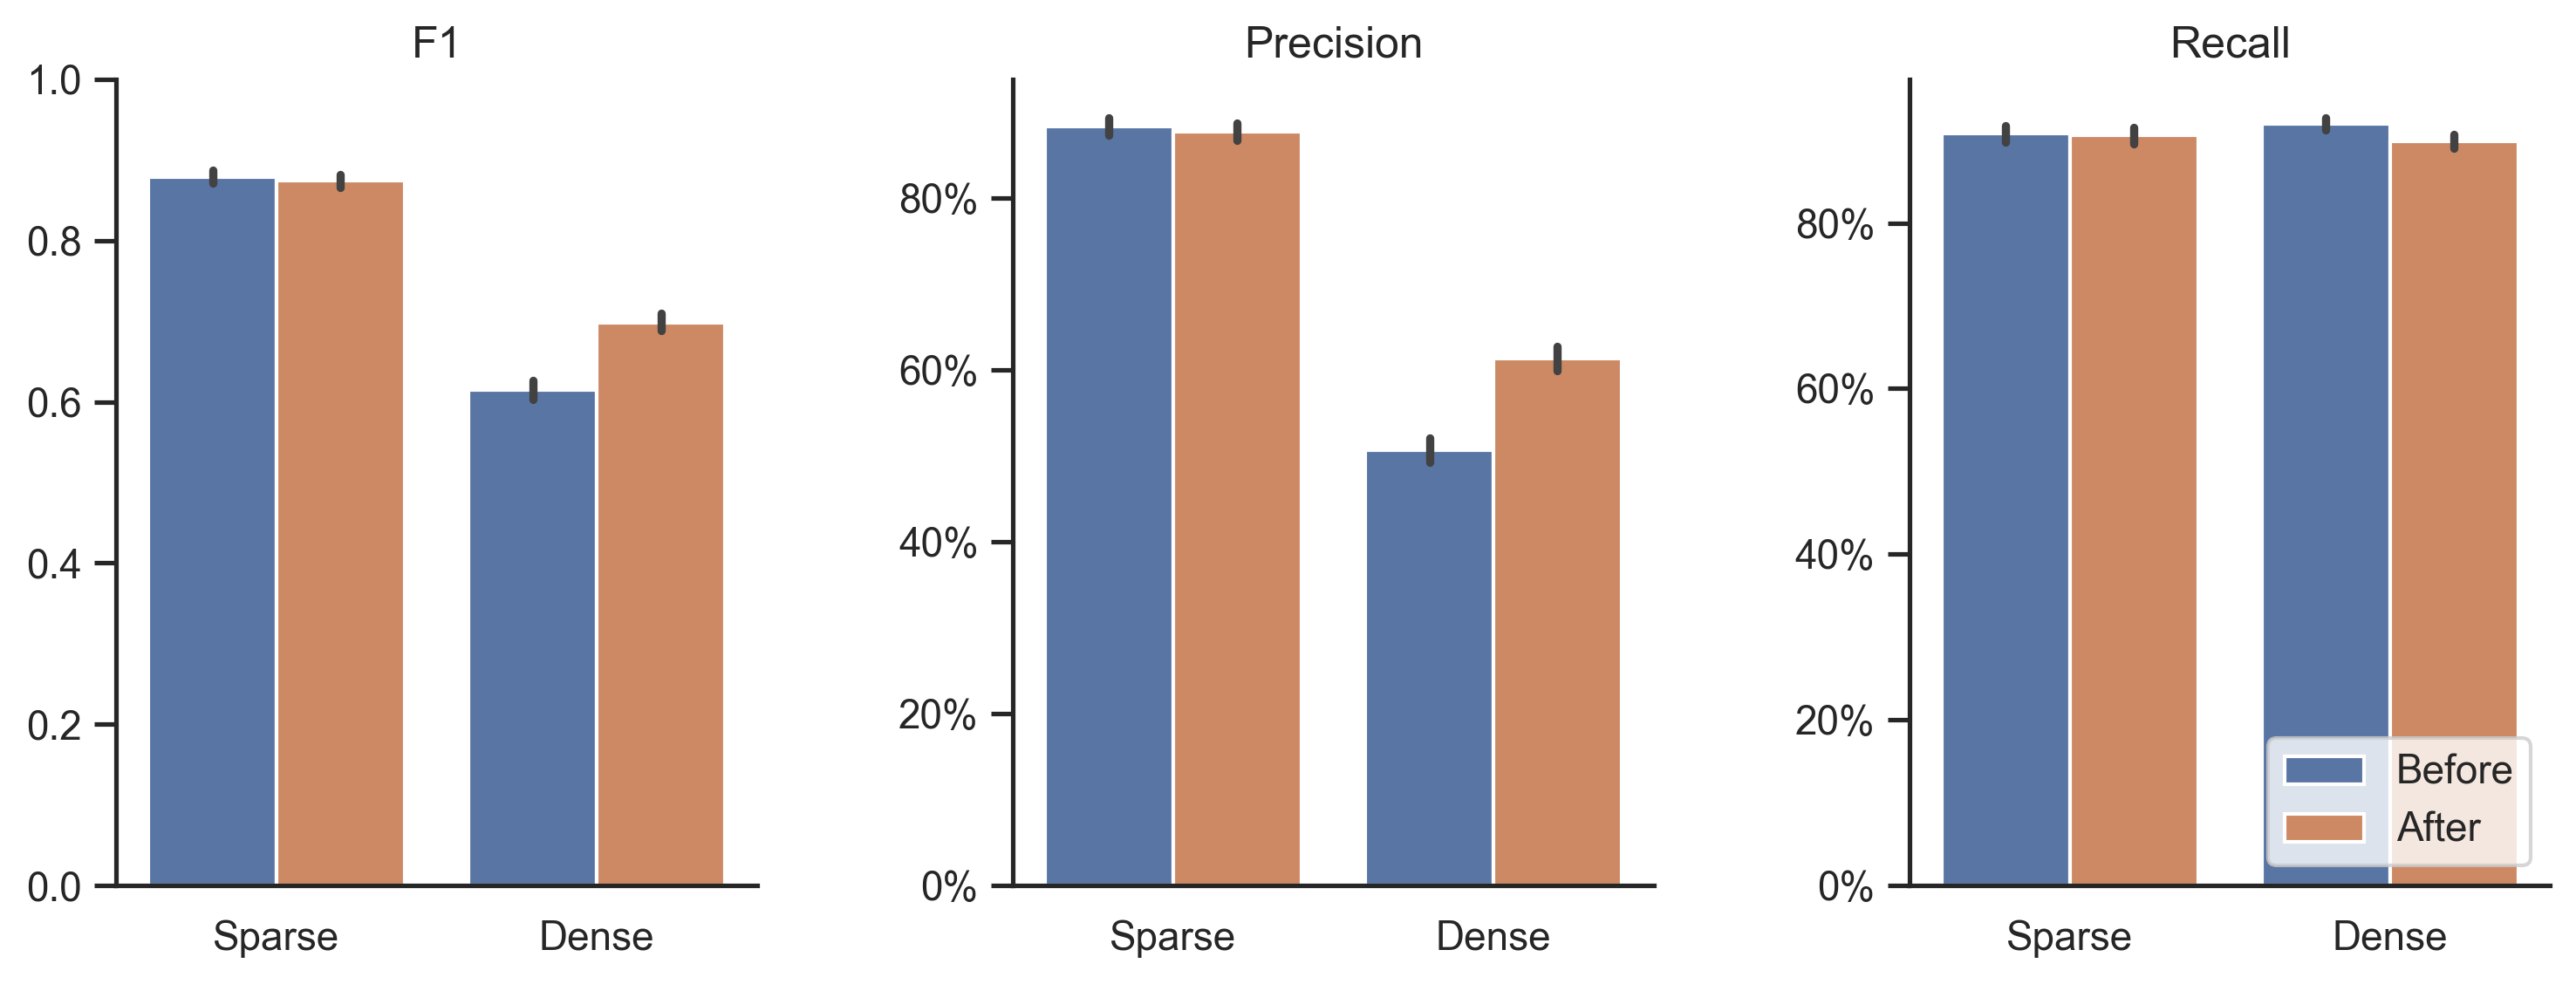

In [9]:
from scipy.stats import ttest_ind

def test(ax, x1, x2, y, h, fs, a, b):
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c="k")
    stat,p_value = ttest_ind(a, b)
    ax.text((x1+x2)*.5, y - h, convert_pvalue_to_asterisks(p_value), ha='center', va='bottom', color="k")

# plot precision
sns.set(font_scale=1, style='white')
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=300)
plt.subplots_adjust(wspace=0.4)
sns.despine(fig, top=True, right=True)

# precision
ax = sns.barplot(data=prec, hue='stat', x='type', y='value', ax=axs[1], legend=False)
ax.set_xticks([*range(2)], ['Sparse', 'Dense'])
ax.set_ylabel(None)
ax.set_title('Precision')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax.tick_params(left=True, direction='out')
ax.set_xlabel(None)
# test(ax, 0, 4, 1.15 - .05, .02, 'small', df['before_precision'], df['my_precision'])
# test(ax, 3, 4, 1.15 - .12, .02, 'small', df['after_precision'], df['my_precision'])
# ax.text(0, m['raw_precision']+.03, f"{m['raw_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)
# ax.text(1, m['ada_precision']+.03, f"{m['ada_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)
# ax.text(2, m['mul_precision']+.03, f"{m['mul_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)
# ax.text(3, m['guo_precision']+.03, f"{m['guo_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)
# ax.text(4, m['my_precision']+.03, f"{m['my_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)

# recall
ax = sns.barplot(data=recall, hue='stat', x='type', y='value', ax=axs[2])
ax.set_xticks([*range(2)], ['Sparse', 'Dense'])
ax.set_ylabel(None)
ax.set_title('Recall')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax.tick_params(left=True, direction='out')
ax.set_xlabel(None)

# f1
ax = sns.barplot(data=f1, hue='stat', x='type', y='value', ax=axs[0], legend=False)
ax.set_xticks([*range(2)], ['Sparse', 'Dense'])
ax.set_ylabel(None)
ax.set_title('F1')
ax.set_ylim(0, 1)
ax.tick_params(left=True, direction='out')
ax.set_xlabel(None)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles[:2], labels=['Before', 'After'], loc='lower right')

In [32]:
handles, labels

([], [])